In [89]:
%matplotlib inline
df = pd.read_csv('cvs_products_cleaned.csv')
df.shape

(9690, 15)

In [90]:
df.sample(10).T

,6565,8666,3120,8230,1877,1103,3407,5160,7521,6222
ave_rating,NaN,NaN,NaN,3,4.5,3.4,4.4,NaN,NaN,2
brand,sky-organics,john-frieda,lapalette,hask,la-roche-posay,loreal-paris,dove,duke-cannon,krizia,the-creme-shop
details,Sky Organics Castor Oil is cold-pressed from e...,JOHN FRIEDA LONDON • PARIS • NEW YORK WITH INC...,This 5 kinds of mask sheets with fortified eye...,Blue Chamomile & Argan Oil Blonde Care Conditi...,A pioneer in UV protection research for over 1...,This unique dual-action treatment instantly re...,If you are wondering how to get stronger hair...,"A man with a head of thick, healthy hair does ...",Krizia Time is an alluring fragrance intended ...,Our Invisible Makeup Patches conceal pimples f...
family,skin-care,beauty,skin-care,beauty,beauty,skin-care,beauty,beauty,beauty,skin-care
genus,face,hair-care,k-beauty,hair-care,skin-care,face,hair-care,hair-care,perfume-cologne,face
name,Sky Organics Organic Moisturizing Castor Oil f...,John Frieda Full Repair Full Body Conditioner,"Lapalette Returning Snail Mask, 0.676 OZ",HASK Blue Chamomile with Argan Blonde Conditio...,La Roche-Posay Anthelios Clear Skin Face Sunsc...,L'Oreal Paris RevitaLift Double Lifting Day Tr...,Dove Nourishing Rituals Shampoo Fortifying Rit...,"Duke Cannon News Anchor 2-in-1 Hair Wash, 10 OZ",Krizia Time by Krizia Eau De Toilette Spray 2....,The Creme Shop What Acne? Invisible Makeup Pat...
num_reviews,NaN,NaN,NaN,1,95,72,68,NaN,NaN,1
ounces,16,20,0.67,12,1.7,1,12,10,2.5,NaN
pounds,1,0,0.06,1,0.1,0.24,0.9,0.7,0.76,0.01
price,15.99,13.99,2.49,5.99,19.99,19.49,5.49,9.99,60.99,3.99


In [91]:
df.describe()

,ave_rating,num_reviews,ounces,pounds,price,ounces_from_lbs,lbs_from_oz,price_per_oz
count,5801.000000,5801.000000,7935.000000,9687.000000,9690.000000,9690.000000,9690.000000,7935.000000
mean,4.326961,312.851405,5.771876,0.539015,21.067706,6.149581,0.538930,38.483488
std,0.703629,2361.578525,10.749996,0.951619,32.145202,12.741815,0.951489,216.860552
min,1.000000,1.000000,0.001000,0.000000,0.990000,0.000000,0.000000,0.050000
25%,4.100000,4.000000,1.000000,0.100000,6.990000,1.000000,0.100000,1.436250
50%,4.500000,16.000000,3.400000,0.340000,10.990000,3.300000,0.340000,6.660000
75%,4.800000,133.000000,8.000000,0.680000,21.990000,7.680000,0.680000,24.489898
max,5.000000,97407.000000,400.000000,25.000000,617.990000,400.000000,25.000000,7690.000000


In [92]:
df['price_per_oz'].mean()

38.4834876895935

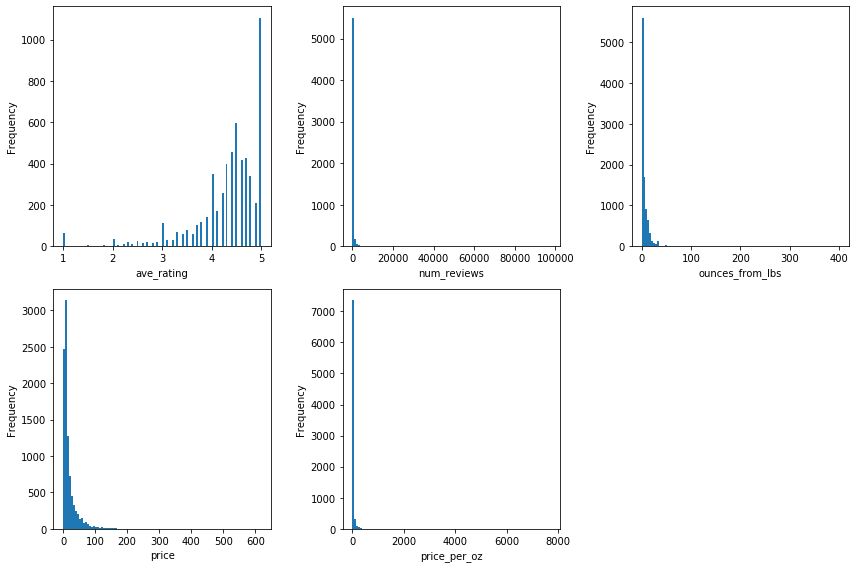

In [93]:
cont_vars = ['ave_rating', 'num_reviews', 'ounces_from_lbs', 'price', 'price_per_oz']
fig = plt.figure(figsize=(12,8))
for i, var in enumerate(cont_vars):
    plt.subplot(2,3,i+1)
    df[var].plot.hist(bins=100)
    plt.xlabel('%s'%var)

plt.tight_layout()

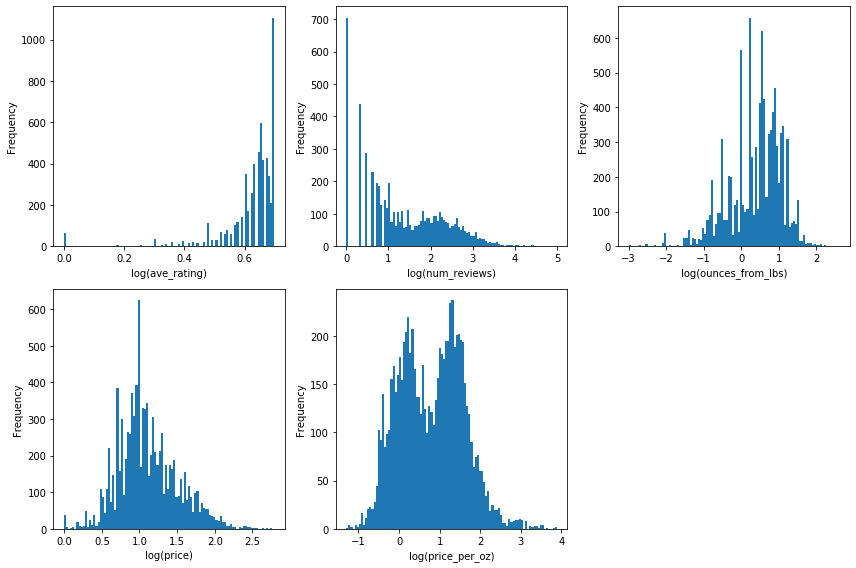

In [94]:
cont_vars = ['ave_rating', 'num_reviews', 'ounces_from_lbs', 'price', 'price_per_oz']

fig = plt.figure(figsize=(12,8))
for i, var in enumerate(cont_vars):
    plt.subplot(2,3,i+1)
    newvar = df.loc[df[var] > 0][var]
    logvar = np.log10(newvar)
    logvar.plot.hist(bins=100)
    plt.xlabel('log(%s)'%var)

plt.tight_layout()

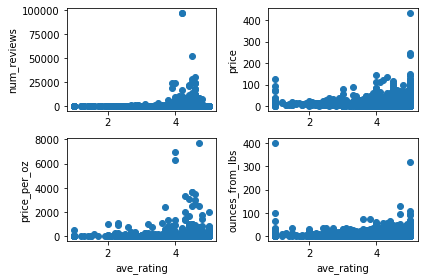

In [95]:
xvar = 'ave_rating'
yvars = ['num_reviews','price','price_per_oz','ounces_from_lbs']

for i, var in enumerate(yvars):
    plt.subplot(2,2,i+1)
    plt.scatter(df[xvar], df[var])
    plt.ylabel('%s' %var)
    if i >1 :
        plt.xlabel(f'{xvar}')
plt.tight_layout()
    

In [96]:
df.groupby('family').size()

family
baby-child      42
beauty        5379
hair-care       73
makeup        1830
skin-care     2366
dtype: int64

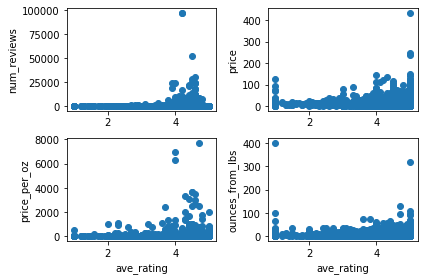

In [68]:
df.groupby('family').size()

family
baby-child             42
beauty               5379
hair-care              73
health-medicine        10
household-grocery       8
makeup               1830
personal-care          19
shop                   13
skin-care            2366
vitamins                4
dtype: int64

In [84]:
## NEED TO REMOVE 'health-medicine', 'vitamins'
## from 'shop' need to remove != 'skin',
## from 'household-grocery' != 'as-seen-on-tv'

shop = df.loc[df['family'] == 'personal-care']
#rawr = shop.groupby('species').size
shop
#df.loc[df['family'] == 'shop']['url'].values

,ave_rating,brand,details,family,genus,name,num_reviews,ounces,pounds,price,species,url,ounces_from_lbs,lbs_from_oz,price_per_oz,newfamily
149,4.5,cvs-health,No water required. Gentle for all hair & skin ...,personal-care,incontinence,CVS Health Foaming Rinseless Shampoo & Body Wash,18.0,7.10,0.58,7.79,skin-care-medication,https://www.cvs.com/shop/cvs-health-foaming-ri...,7.10,0.58,1.097183,personal-care
181,4.0,cvs-health,3-Day Treatment WHITER TEETH IN JUST 3 DAYS Sl...,personal-care,oral-care,"CVS Health Boost Teeth Whitening Strips, 6CT",1.0,NaN,0.10,9.79,teeth-whitening,https://www.cvs.com/shop/cvs-health-boost-teet...,1.60,0.10,NaN,personal-care
2050,4.0,burts-bees,"LIP CARE: Enriched with sweet juicy flavor, r...",personal-care,lip-care,Burt's Bees 100% Natural Moisturizing Lip Balm...,27.0,0.15,0.04,3.99,lip-balm-without-spf,https://www.cvs.com/shop/burt-s-bees-strawberr...,0.15,0.04,26.600000,personal-care
2744,4.6,lip-smacker,Lip Smacker Kiss Therapy Strawberry lip balm p...,personal-care,lip-care,"Lip Smacker Kiss Therapy SPF 30 Lip Balm, Stra...",63.0,NaN,0.09,6.29,lip-balm-with-spf,https://www.cvs.com/shop/lip-smacker-kiss-ther...,1.44,0.09,NaN,personal-care
2748,4.6,dr-lip-bang,FOR BOYS & GIRLS 100% NATURAL LIP FREAK® THE S...,personal-care,lip-care,"Dr. Lip Bang's LipFreak, Coco Loco",9.0,NaN,0.01,5.29,lip-balm-without-spf,https://www.cvs.com/shop/dr-lip-bang-s-lip-fre...,0.16,0.01,NaN,personal-care
2882,5.0,burts-bees,"LIP CARE: Bursting with sweet, juicy flavor, ...",personal-care,lip-care,Burt's Bees Flavor Crystals 100% Natural Lip B...,5.0,0.16,0.01,4.29,lip-balm-without-spf,https://www.cvs.com/shop/burt-s-bees-flavor-cr...,0.16,0.01,26.812500,personal-care
3046,4.4,vichy-laboratories,Vichy 24 Hour Dry Touch Deodorant for Sensitiv...,personal-care,deodorant,Vichy 24 Hour Dry Touch Deodorant for Sensitiv...,26.0,1.70,0.19,17.00,roll-ons,https://www.cvs.com/shop/vichy-24-hour-dry-tou...,1.70,0.19,10.000000,personal-care
3221,5.0,burts-bees,LIP CARE: Renew your lips with Burt's Bees Med...,personal-care,lip-care,Burt's Bees 100% Natural Medicated Moisturizin...,2.0,0.30,0.01,8.29,lip-balm-without-spf,https://www.cvs.com/shop/burt-s-bees-medicated...,0.30,0.01,27.633333,personal-care
3374,4.0,vaseline,Vaseline Lip Therapy Lip Balm Tins are clinica...,personal-care,lip-care,"Vaseline Lip Therapy Pink Bubbly Lip Balm Tin,...",17.0,0.60,0.04,4.99,lip-balm-without-spf,https://www.cvs.com/shop/vaseline-lip-therapy-...,0.60,0.04,8.316667,personal-care
3380,4.8,burts-bees,LIP CARE: Renew your lips with Burt's Bees Mo...,personal-care,lip-care,Burt's Bees 100% Natural Moisturizing Lip Balm...,9.0,NaN,0.04,11.49,lip-balm-without-spf,https://www.cvs.com/shop/burt-s-bees-lip-balm-...,0.64,0.04,NaN,personal-care


In [75]:
cat_vars = ['brand', 'family','genus','species']

brand_subset = df.groupby('brand').filter(lambda x: x.num_reviews.count() > 50)
#brand_subset = brand_subset.groupby('brand').filter(lambda x: x.num_reviews.count() > 50)
#df.groupby('brand')['num_reviews'].mean().sort_values().plot.barh()
#plt.show()

In [73]:
brand_subset.shape

(4946, 15)

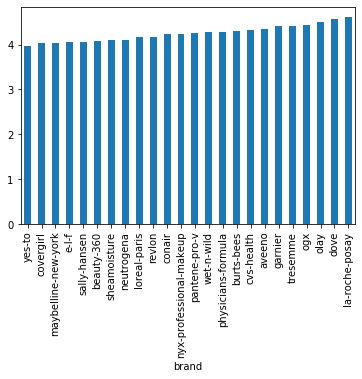

In [76]:
brand_subset.groupby('brand')['ave_rating'].mean().sort_values().plot.bar()

In [77]:
brand_subset = df.groupby(['family','brand']).filter(lambda x: x.num_reviews.count() > 10)

In [60]:
print(df.groupby('family').size())

print(brand_subset['family'].unique())
print(len(brand_subset['genus'].unique()))
print(len(brand_subset['species'].unique()))
print(set(brand_subset['family'].unique()) & set(brand_subset['genus'].unique()))
print(set(brand_subset['family'].unique()) & set(brand_subset['species'].unique()))
print(set(brand_subset['genus'].unique()) & set(brand_subset['species'].unique()))

family
baby-child             42
beauty               5379
hair-care              73
health-medicine        10
household-grocery       8
makeup               1830
personal-care          19
shop                   13
skin-care            2366
vitamins                4
dtype: int64


NameError: name 'brand_subset' is not defined

In [67]:
df.loc[df['family'].isin(['vitamins','shop', 'household-grocery'])]
df.loc[9671,:]['url']

'https://www.cvs.com/shop/oshadhi-essential-oil-singles-turmeric-0-33-oz-prodid-993876'

In [58]:
beauty = df.loc[df['family'].isin(['beauty'])]
beauty.groupby('genus').size()
#beauty.groupby('genus').nunique()

genus
bath-body                    918
beauty-tools-accessories     602
hair-care                   1995
makeup                        14
perfume-cologne             1580
skin-care                    270
dtype: int64

In [59]:
df['newfamily'] = df['family']
print(df.groupby('newfamily').size())
#print(df.loc[df['family'].isin(['beauty'])]['genus'].unique())
df['newfamily'] = df['newfamily'].replace('beauty', df['genus'])
print(df.groupby('newfamily').size())
#df.loc[df['family'].isin(['beauty']) & df['genus'].isin(['vitamins','household-grocery','personal-care', 'health-medicine'])].count()

newfamily
baby-child             42
beauty               5379
hair-care              73
health-medicine        10
household-grocery       8
makeup               1830
personal-care          19
shop                   13
skin-care            2366
vitamins                4
dtype: int64
newfamily
baby-child                    42
bath-body                    918
beauty-tools-accessories     602
hair-care                   2068
health-medicine               10
household-grocery              8
makeup                      1844
perfume-cologne             1580
personal-care                 19
shop                          13
skin-care                   2636
vitamins                       4
dtype: int64


In [57]:
df.groupby('newfamily').size()
#df['newfamily'].replace('bath-body', 'skin-care')


newfamily
baby-child                    42
bath-body                    918
beauty-tools-accessories     602
hair-care                   2068
health-medicine               10
household-grocery              8
makeup                      1844
perfume-cologne             1580
personal-care                 19
shop                          13
skin-care                   2636
vitamins                       4
dtype: int64

In [37]:
makeup = df.loc[df['family'].isin(['makeup'])]
makeup.groupby('genus').size()

genus
eyes             751
face             500
korean-makeup      2
lips             253
nails            324
dtype: int64

In [38]:
skincare = df.loc[df['family'].isin(['skin-care'])]
skincare.groupby('genus').size()

genus
body           425
face          1576
hands-feet      76
k-beauty       289
dtype: int64

genus
body           425
face          1576
hands-feet      76
k-beauty       289
dtype: int64